In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import seaborn as sn
import math as math
import time
from prettytable import PrettyTable

# DATA READ

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/ENS 491 492/tasks/classification/data/data_march

/content/drive/MyDrive/ENS 491 492/tasks/classification/data/data_march


In [ ]:
df_crab = pd.read_csv("crab_data_full_energy_range.txt", sep=";", header=None)
df_crab = df_crab.drop(6,axis=1)
df_crab.columns = ["Event Number","Cloud Number","X position","Y position","Z position","Energy"]

In [ ]:
df_crab

,Event Number,Cloud Number,X position,Y position,Z position,Energy
0,1,0,16.21940,21.64080,0.000065,0.232400
1,1,1,16.21940,21.64090,0.000055,0.558021
2,1,2,16.21940,21.64080,0.000028,0.218591
3,1,3,16.21940,21.64080,0.000023,0.367157
4,1,4,16.21940,21.64080,0.000020,0.017048
...,...,...,...,...,...,...
900171,46644,19,20.48940,8.74456,4.326370,0.022420
900172,46644,20,20.48940,8.74456,4.326370,0.022420
900173,46644,21,20.48940,8.74459,4.326360,4.241340
900174,46645,0,2.76642,8.38290,2.907080,362.999000


In [ ]:
df_albedo_all = pd.read_csv("albedo_data.txt", sep=";", header=None)
df_albedo_all = df_albedo_all.drop(20,axis=1)
df_albedo_all = df_albedo_all.drop(6,axis=1)
df_albedo_all.columns = ["Event Number","Cloud Number","X position","Y position","Z position","Energy",
                   "Particle Type", "Current Volume", "Previous Volume 1", "Previous Volume 2",
                   "Previous Volume 3", "Previous Volume 4", "Process in Current Volume", 
                   "Process in Prev Vol 1", "Process in Prev Vol 2", "Process in Prev Vol 3"
                   "Process in Prev Vol 4", "Vertex Volume", "Vertex Energy", "Current Step Vol" ]      

In [ ]:
df_albedo_all

,Event Number,Cloud Number,X position,Y position,Z position,Energy,Particle Type,Current Volume,Previous Volume 1,Previous Volume 2,Previous Volume 3,Previous Volume 4,Process in Current Volume,Process in Prev Vol 1,Process in Prev Vol 2,Process in Prev Vol 3Process in Prev Vol 4,Vertex Volume,Vertex Energy,Current Step Vol
0,1,0,8.08324,15.9917,4.99798,0.23182,2.000000e+00,2.000000e+00,3.300000e+01,1.0,6.0,1.200000e+01,1.000000e+00,1.000000,1.0,1.0,1.0,35.1546,1.000000e+01
1,1,1,8.08323,15.9917,4.99790,8.44356,2.000000e+00,2.000000e+00,3.300000e+01,1.0,6.0,1.200000e+01,1.000000e+00,1.000000,1.0,1.0,1.0,35.1546,1.000000e+01
2,1,2,8.08324,15.9917,4.99798,0.03751,2.000000e+00,2.000000e+00,3.300000e+01,1.0,6.0,1.200000e+01,1.000000e+00,1.000000,1.0,1.0,1.0,35.1546,1.000000e+01
3,1,3,8.08324,15.9917,4.99798,0.03751,2.000000e+00,2.000000e+00,3.300000e+01,1.0,6.0,1.200000e+01,1.000000e+00,1.000000,1.0,1.0,1.0,35.1546,1.000000e+01
4,1,4,8.08324,15.9917,4.99798,0.37818,2.000000e+00,2.000000e+00,3.300000e+01,1.0,6.0,1.200000e+01,1.000000e+00,1.000000,1.0,1.0,1.0,35.1546,1.000000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7587424,206563,2,10.23030,25.4719,4.24509,557.01100,2.039997e-320,2.032092e-320,9.000000e+00,9.0,33.0,2.039997e-320,2.032092e-320,15.000000,33.0,1.0,0.0,5000.0000,2.032092e-320
7587425,206563,3,13.56710,25.2265,3.81690,878.22600,2.039997e-320,2.032092e-320,9.000000e+00,9.0,33.0,2.039997e-320,2.032092e-320,15.000000,33.0,1.0,0.0,5000.0000,2.032092e-320
7587426,206563,4,16.77140,21.8459,3.39856,3342.46000,2.039997e-320,2.032092e-320,9.000000e+00,9.0,33.0,2.039997e-320,2.032092e-320,15.000000,33.0,1.0,0.0,5000.0000,2.032092e-320
7587427,206563,5,17.41190,21.5216,3.26552,452.65000,2.039997e-320,2.032092e-320,9.000000e+00,9.0,33.0,2.039997e-320,2.032092e-320,15.000000,33.0,1.0,0.0,5000.0000,2.032092e-320


In [ ]:
df_albedo = df_albedo_all[["Event Number","Cloud Number","X position","Y position","Z position","Energy"]]

In [ ]:
df_albedo

,Event Number,Cloud Number,X position,Y position,Z position,Energy
0,1,0,8.08324,15.9917,4.99798,0.23182
1,1,1,8.08323,15.9917,4.99790,8.44356
2,1,2,8.08324,15.9917,4.99798,0.03751
3,1,3,8.08324,15.9917,4.99798,0.03751
4,1,4,8.08324,15.9917,4.99798,0.37818
...,...,...,...,...,...,...
7587424,206563,2,10.23030,25.4719,4.24509,557.01100
7587425,206563,3,13.56710,25.2265,3.81690,878.22600
7587426,206563,4,16.77140,21.8459,3.39856,3342.46000
7587427,206563,5,17.41190,21.5216,3.26552,452.65000


In [ ]:
df_cxb = pd.read_csv("cxb_small.csv", header=None)
df_cxb.drop(0,axis=0,inplace=True)
df_cxb.columns = ["Event Number","Cloud Number","X position","Y position","Z position","Energy"]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_cxb = df_cxb.astype({"Event Number":'float',"Cloud Number":'float',"X position":'float',
                        "Y position":'float',"Z position":'float',"Energy":'float',})

In [ ]:
df_cxb

,Event Number,Cloud Number,X position,Y position,Z position,Energy
1,527446.0,0.0,19.36260,21.43420,4.99906,57.13070
2,527446.0,1.0,19.37020,21.43330,5.00000,6.20780
3,527446.0,2.0,24.74350,1.75022,2.05831,176.64500
4,527446.0,3.0,22.40070,4.43341,3.12297,141.18800
5,166258.0,0.0,11.27350,4.00502,4.71371,0.10779
...,...,...,...,...,...,...
1000257,1370631.0,230.0,6.35211,11.24140,3.57453,0.51511
1000258,1370631.0,231.0,6.35212,11.24140,3.57453,0.42211
1000259,1370631.0,232.0,6.35209,11.24140,3.57451,3.73772
1000260,1370631.0,233.0,21.85050,1.88650,2.26709,63.11690


# DATA PREP

## Crab data

In [ ]:
df_copy = df_crab.copy()

In [ ]:
df_copy["xpos_mult_energy"] = df_copy["X position"] * df_copy["Energy"]
df_copy["ypos_mult_energy"] = df_copy["Y position"] * df_copy["Energy"]
df_copy["zpos_mult_energy"] = df_copy["Z position"] * df_copy["Energy"]
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy
0,1,0,16.21940,21.64080,0.000065,0.232400,3.769389,5.029322,1.506861e-05
1,1,1,16.21940,21.64090,0.000055,0.558021,9.050766,12.076077,3.086085e-05
2,1,2,16.21940,21.64080,0.000028,0.218591,3.545415,4.730484,6.136724e-06
3,1,3,16.21940,21.64080,0.000023,0.367157,5.955066,7.945571,8.434367e-06
4,1,4,16.21940,21.64080,0.000020,0.017048,0.276502,0.368924,3.369629e-07
...,...,...,...,...,...,...,...,...,...
900171,46644,19,20.48940,8.74456,4.326370,0.022420,0.459372,0.196053,9.699722e-02
900172,46644,20,20.48940,8.74456,4.326370,0.022420,0.459372,0.196053,9.699722e-02
900173,46644,21,20.48940,8.74459,4.326360,4.241340,86.902512,37.088779,1.834956e+01
900174,46645,0,2.76642,8.38290,2.907080,362.999000,1004.207694,3042.984317,1.055267e+03


In [ ]:
df_copy['Energy_sum'] = df_copy.groupby('Event Number').Energy.transform(sum)
df_copy['weighted_xpos_sum'] = df_copy.groupby('Event Number').xpos_mult_energy.transform(sum)
df_copy['weighted_ypos_sum'] = df_copy.groupby('Event Number').ypos_mult_energy.transform(sum)
df_copy['weighted_zpos_sum'] = df_copy.groupby('Event Number').zpos_mult_energy.transform(sum)
df_copy['weighted_xpos'] = df_copy['weighted_xpos_sum']/df_copy['Energy_sum']
df_copy['weighted_ypos'] = df_copy['weighted_ypos_sum']/df_copy['Energy_sum']
df_copy['weighted_zpos'] = df_copy['weighted_zpos_sum']/df_copy['Energy_sum']
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy,Energy_sum,weighted_xpos_sum,weighted_ypos_sum,weighted_zpos_sum,weighted_xpos,weighted_ypos,weighted_zpos
0,1,0,16.21940,21.64080,0.000065,0.232400,3.769389,5.029322,1.506861e-05,8.361567,135.619468,180.951174,0.000329,16.219383,21.640820,0.000039
1,1,1,16.21940,21.64090,0.000055,0.558021,9.050766,12.076077,3.086085e-05,8.361567,135.619468,180.951174,0.000329,16.219383,21.640820,0.000039
2,1,2,16.21940,21.64080,0.000028,0.218591,3.545415,4.730484,6.136724e-06,8.361567,135.619468,180.951174,0.000329,16.219383,21.640820,0.000039
3,1,3,16.21940,21.64080,0.000023,0.367157,5.955066,7.945571,8.434367e-06,8.361567,135.619468,180.951174,0.000329,16.219383,21.640820,0.000039
4,1,4,16.21940,21.64080,0.000020,0.017048,0.276502,0.368924,3.369629e-07,8.361567,135.619468,180.951174,0.000329,16.219383,21.640820,0.000039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900171,46644,19,20.48940,8.74456,4.326370,0.022420,0.459372,0.196053,9.699722e-02,330.580500,7280.013574,2239.937651,629.535736,22.021909,6.775771,1.904334
900172,46644,20,20.48940,8.74456,4.326370,0.022420,0.459372,0.196053,9.699722e-02,330.580500,7280.013574,2239.937651,629.535736,22.021909,6.775771,1.904334
900173,46644,21,20.48940,8.74459,4.326360,4.241340,86.902512,37.088779,1.834956e+01,330.580500,7280.013574,2239.937651,629.535736,22.021909,6.775771,1.904334
900174,46645,0,2.76642,8.38290,2.907080,362.999000,1004.207694,3042.984317,1.055267e+03,362.999000,1004.207694,3042.984317,1055.267133,2.766420,8.382900,2.907080


In [ ]:
df_copy = df_copy[df_copy["Cloud Number"]== 0].reset_index(drop=True)
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy,Energy_sum,weighted_xpos_sum,weighted_ypos_sum,weighted_zpos_sum,weighted_xpos,weighted_ypos,weighted_zpos
0,1,0,16.21940,21.64080,0.000065,0.23240,3.769389,5.029322,0.000015,8.361567,135.619468,180.951174,0.000329,16.219383,21.640820,0.000039
1,2,0,20.33660,25.44160,0.059619,0.18359,3.733596,4.670823,0.010945,10.157550,206.570031,258.424324,0.605783,20.336600,25.441600,0.059639
2,3,0,10.82970,18.86050,0.017383,0.23426,2.536966,4.418261,0.004072,10.155360,109.979502,191.534646,0.176633,10.829700,18.860449,0.017393
3,4,0,19.42060,21.12720,0.015625,0.17484,3.395498,3.693880,0.002732,10.148250,197.085104,214.403495,0.158395,19.420600,21.127140,0.015608
4,5,0,8.06970,1.01065,0.010896,0.23376,1.886373,0.236250,0.002547,10.178740,82.139748,10.287109,0.110857,8.069736,1.010647,0.010891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46641,46642,0,9.55477,11.59360,2.657350,523.81400,5004.922293,6072.889990,1391.957133,523.814000,5004.922293,6072.889990,1391.957133,9.554770,11.593600,2.657350
46642,46643,0,0.87418,1.50607,0.943614,246.99000,215.913718,371.984229,233.063222,362.159000,316.265305,544.931213,341.318051,0.873277,1.504674,0.942454
46643,46644,0,22.62810,6.02094,0.961114,115.29500,2608.906789,694.184277,110.811639,330.580500,7280.013574,2239.937651,629.535736,22.021909,6.775771,1.904334
46644,46645,0,2.76642,8.38290,2.907080,362.99900,1004.207694,3042.984317,1055.267133,362.999000,1004.207694,3042.984317,1055.267133,2.766420,8.382900,2.907080


In [ ]:
df_crab_weighted = df_copy[["Event Number","weighted_xpos","weighted_ypos","weighted_zpos","Energy_sum"]]
df_crab_weighted.columns = ["event_num","xpos","ypos","zpos","energy"]

In [ ]:
df_crab_weighted

,event_num,xpos,ypos,zpos,energy
0,1,16.219383,21.640820,0.000039,8.361567
1,2,20.336600,25.441600,0.059639,10.157550
2,3,10.829700,18.860449,0.017393,10.155360
3,4,19.420600,21.127140,0.015608,10.148250
4,5,8.069736,1.010647,0.010891,10.178740
...,...,...,...,...,...
46641,46642,9.554770,11.593600,2.657350,523.814000
46642,46643,0.873277,1.504674,0.942454,362.159000
46643,46644,22.021909,6.775771,1.904334,330.580500
46644,46645,2.766420,8.382900,2.907080,362.999000


## Albedo Data

In [ ]:
df_copy = df_albedo.copy()

In [ ]:
df_copy["xpos_mult_energy"] = df_copy["X position"] * df_copy["Energy"]
df_copy["ypos_mult_energy"] = df_copy["Y position"] * df_copy["Energy"]
df_copy["zpos_mult_energy"] = df_copy["Z position"] * df_copy["Energy"]
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy
0,1,0,8.08324,15.9917,4.99798,0.23182,1.873857,3.707196,1.158632
1,1,1,8.08323,15.9917,4.99790,8.44356,68.251237,135.026878,42.200069
2,1,2,8.08324,15.9917,4.99798,0.03751,0.303202,0.599849,0.187474
3,1,3,8.08324,15.9917,4.99798,0.03751,0.303202,0.599849,0.187474
4,1,4,8.08324,15.9917,4.99798,0.37818,3.056920,6.047741,1.890136
...,...,...,...,...,...,...,...,...,...
7587424,206563,2,10.23030,25.4719,4.24509,557.01100,5698.389633,14188.128491,2364.561826
7587425,206563,3,13.56710,25.2265,3.81690,878.22600,11914.979965,22154.568189,3352.100819
7587426,206563,4,16.77140,21.8459,3.39856,3342.46000,56057.733644,73019.046914,11359.550858
7587427,206563,5,17.41190,21.5216,3.26552,452.65000,7881.496535,9741.752240,1478.137628


In [ ]:
df_copy['Energy_sum'] = df_copy.groupby('Event Number').Energy.transform(sum)
df_copy['weighted_xpos_sum'] = df_copy.groupby('Event Number').xpos_mult_energy.transform(sum)
df_copy['weighted_ypos_sum'] = df_copy.groupby('Event Number').ypos_mult_energy.transform(sum)
df_copy['weighted_zpos_sum'] = df_copy.groupby('Event Number').zpos_mult_energy.transform(sum)
df_copy['weighted_xpos'] = df_copy['weighted_xpos_sum']/df_copy['Energy_sum']
df_copy['weighted_ypos'] = df_copy['weighted_ypos_sum']/df_copy['Energy_sum']
df_copy['weighted_zpos'] = df_copy['weighted_zpos_sum']/df_copy['Energy_sum']
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy,Energy_sum,weighted_xpos_sum,weighted_ypos_sum,weighted_zpos_sum,weighted_xpos,weighted_ypos,weighted_zpos
0,1,0,8.08324,15.9917,4.99798,0.23182,1.873857,3.707196,1.158632,35.15456,284.164163,562.185061,175.705968,8.083280,15.991810,4.998099
1,1,1,8.08323,15.9917,4.99790,8.44356,68.251237,135.026878,42.200069,35.15456,284.164163,562.185061,175.705968,8.083280,15.991810,4.998099
2,1,2,8.08324,15.9917,4.99798,0.03751,0.303202,0.599849,0.187474,35.15456,284.164163,562.185061,175.705968,8.083280,15.991810,4.998099
3,1,3,8.08324,15.9917,4.99798,0.03751,0.303202,0.599849,0.187474,35.15456,284.164163,562.185061,175.705968,8.083280,15.991810,4.998099
4,1,4,8.08324,15.9917,4.99798,0.37818,3.056920,6.047741,1.890136,35.15456,284.164163,562.185061,175.705968,8.083280,15.991810,4.998099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7587424,206563,2,10.23030,25.4719,4.24509,557.01100,5698.389633,14188.128491,2364.561826,6672.81300,96500.974874,155921.721906,24808.850974,14.461813,23.366715,3.717900
7587425,206563,3,13.56710,25.2265,3.81690,878.22600,11914.979965,22154.568189,3352.100819,6672.81300,96500.974874,155921.721906,24808.850974,14.461813,23.366715,3.717900
7587426,206563,4,16.77140,21.8459,3.39856,3342.46000,56057.733644,73019.046914,11359.550858,6672.81300,96500.974874,155921.721906,24808.850974,14.461813,23.366715,3.717900
7587427,206563,5,17.41190,21.5216,3.26552,452.65000,7881.496535,9741.752240,1478.137628,6672.81300,96500.974874,155921.721906,24808.850974,14.461813,23.366715,3.717900


In [ ]:
df_copy = df_copy[df_copy["Cloud Number"]== 0].reset_index(drop=True)
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy,Energy_sum,weighted_xpos_sum,weighted_ypos_sum,weighted_zpos_sum,weighted_xpos,weighted_ypos,weighted_zpos
0,1,0,8.08324,15.99170,4.99798,0.23182,1.873857,3.707196,1.158632,35.15456,284.164163,562.185061,175.705968,8.083280,15.991810,4.998099
1,2,0,1.63327,11.67270,4.95589,0.14555,0.237722,1.698961,0.721330,53.39540,87.295362,623.190992,264.427971,1.634885,11.671249,4.952261
2,3,0,13.02660,24.34200,4.93733,0.12630,1.645260,3.074395,0.623585,59.81860,775.915262,1454.375822,295.623981,12.971137,24.313104,4.942008
3,4,0,14.70830,19.51040,4.97863,0.14556,2.140940,2.839934,0.724689,60.59620,891.299586,1182.318645,300.738314,14.708836,19.511432,4.962990
4,5,0,14.40510,8.35959,4.83891,0.11008,1.585713,0.920224,0.532667,62.85690,904.290458,527.132412,305.333833,14.386495,8.386230,4.857602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206559,206560,0,18.30980,1.90798,2.62544,554.17600,10146.851725,1057.356724,1454.955837,9729.86010,227700.461223,48691.369959,9226.839936,23.402234,5.004324,0.948301
206560,206561,0,12.37480,3.35205,2.44539,2245.97000,27793.429556,7528.603738,5492.272578,4430.24160,56006.997423,14001.179535,8006.375355,12.641974,3.160365,1.807210
206561,206562,0,11.42890,3.34512,4.08058,1379.94000,15771.196266,4616.064893,5630.955565,6178.61140,72037.463470,47198.958159,11473.133423,11.659167,7.639088,1.856911
206562,206563,0,10.79510,25.49200,4.61529,270.39600,2918.951860,6892.934832,1247.955955,6672.81300,96500.974874,155921.721906,24808.850974,14.461813,23.366715,3.717900


In [ ]:
df_albedo_weighted = df_copy[["Event Number","weighted_xpos","weighted_ypos","weighted_zpos","Energy_sum"]]
df_albedo_weighted.columns = ["event_num","xpos","ypos","zpos","energy"]

In [ ]:
df_albedo_weighted

,event_num,xpos,ypos,zpos,energy
0,1,8.083280,15.991810,4.998099,35.15456
1,2,1.634885,11.671249,4.952261,53.39540
2,3,12.971137,24.313104,4.942008,59.81860
3,4,14.708836,19.511432,4.962990,60.59620
4,5,14.386495,8.386230,4.857602,62.85690
...,...,...,...,...,...
206559,206560,23.402234,5.004324,0.948301,9729.86010
206560,206561,12.641974,3.160365,1.807210,4430.24160
206561,206562,11.659167,7.639088,1.856911,6178.61140
206562,206563,14.461813,23.366715,3.717900,6672.81300


## CXB data

In [ ]:
df_copy = df_cxb.copy()

In [ ]:
df_copy["xpos_mult_energy"] = df_copy["X position"] * df_copy["Energy"]
df_copy["ypos_mult_energy"] = df_copy["Y position"] * df_copy["Energy"]
df_copy["zpos_mult_energy"] = df_copy["Z position"] * df_copy["Energy"]
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy
1,527446.0,0.0,19.36260,21.43420,4.99906,57.13070,1106.198892,1224.550850,285.599797
2,527446.0,1.0,19.37020,21.43330,5.00000,6.20780,120.246328,133.053640,31.039000
3,527446.0,2.0,24.74350,1.75022,2.05831,176.64500,4370.815558,309.167612,363.590170
4,527446.0,3.0,22.40070,4.43341,3.12297,141.18800,3162.710032,625.944291,440.925888
5,166258.0,0.0,11.27350,4.00502,4.71371,0.10779,1.215171,0.431701,0.508091
...,...,...,...,...,...,...,...,...,...
1000257,1370631.0,230.0,6.35211,11.24140,3.57453,0.51511,3.272035,5.790558,1.841276
1000258,1370631.0,231.0,6.35212,11.24140,3.57453,0.42211,2.681293,4.745107,1.508845
1000259,1370631.0,232.0,6.35209,11.24140,3.57451,3.73772,23.742334,42.017206,13.360518
1000260,1370631.0,233.0,21.85050,1.88650,2.26709,63.11690,1379.135823,119.070032,143.091693


In [ ]:
df_copy['Energy_sum'] = df_copy.groupby('Event Number').Energy.transform(sum)
df_copy['weighted_xpos_sum'] = df_copy.groupby('Event Number').xpos_mult_energy.transform(sum)
df_copy['weighted_ypos_sum'] = df_copy.groupby('Event Number').ypos_mult_energy.transform(sum)
df_copy['weighted_zpos_sum'] = df_copy.groupby('Event Number').zpos_mult_energy.transform(sum)
df_copy['weighted_xpos'] = df_copy['weighted_xpos_sum']/df_copy['Energy_sum']
df_copy['weighted_ypos'] = df_copy['weighted_ypos_sum']/df_copy['Energy_sum']
df_copy['weighted_zpos'] = df_copy['weighted_zpos_sum']/df_copy['Energy_sum']
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy,Energy_sum,weighted_xpos_sum,weighted_ypos_sum,weighted_zpos_sum,weighted_xpos,weighted_ypos,weighted_zpos
1,527446.0,0.0,19.36260,21.43420,4.99906,57.13070,1106.198892,1224.550850,285.599797,381.17150,8759.970808,2292.716393,1121.154855,22.981705,6.014921,2.941340
2,527446.0,1.0,19.37020,21.43330,5.00000,6.20780,120.246328,133.053640,31.039000,381.17150,8759.970808,2292.716393,1121.154855,22.981705,6.014921,2.941340
3,527446.0,2.0,24.74350,1.75022,2.05831,176.64500,4370.815558,309.167612,363.590170,381.17150,8759.970808,2292.716393,1121.154855,22.981705,6.014921,2.941340
4,527446.0,3.0,22.40070,4.43341,3.12297,141.18800,3162.710032,625.944291,440.925888,381.17150,8759.970808,2292.716393,1121.154855,22.981705,6.014921,2.941340
5,166258.0,0.0,11.27350,4.00502,4.71371,0.10779,1.215171,0.431701,0.508091,59.48301,670.429495,239.973200,284.356325,11.270941,4.034315,4.780463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000257,1370631.0,230.0,6.35211,11.24140,3.57453,0.51511,3.272035,5.790558,1.841276,17315.12717,147039.989675,151601.120434,34973.090236,8.491996,8.755415,2.019800
1000258,1370631.0,231.0,6.35212,11.24140,3.57453,0.42211,2.681293,4.745107,1.508845,17315.12717,147039.989675,151601.120434,34973.090236,8.491996,8.755415,2.019800
1000259,1370631.0,232.0,6.35209,11.24140,3.57451,3.73772,23.742334,42.017206,13.360518,17315.12717,147039.989675,151601.120434,34973.090236,8.491996,8.755415,2.019800
1000260,1370631.0,233.0,21.85050,1.88650,2.26709,63.11690,1379.135823,119.070032,143.091693,17315.12717,147039.989675,151601.120434,34973.090236,8.491996,8.755415,2.019800


In [ ]:
df_copy = df_copy[df_copy["Cloud Number"]== 0].reset_index(drop=True)
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy,Energy_sum,weighted_xpos_sum,weighted_ypos_sum,weighted_zpos_sum,weighted_xpos,weighted_ypos,weighted_zpos
0,527446.0,0.0,19.362600,21.43420,4.999060,57.13070,1106.198892,1224.550850,285.599797,381.17150,8759.970808,2292.716393,1121.154855,22.981705,6.014921,2.941340
1,166258.0,0.0,11.273500,4.00502,4.713710,0.10779,1.215171,0.431701,0.508091,59.48301,670.429495,239.973200,284.356325,11.270941,4.034315,4.780463
2,1084655.0,0.0,18.516400,12.74640,0.483097,23.98700,444.152887,305.747897,11.588048,23.98700,444.152887,305.747897,11.588048,18.516400,12.746400,0.483097
3,1965259.0,0.0,15.626100,1.25146,3.933500,550.57700,8603.371260,689.025092,2165.694629,15189.93390,308424.391680,130644.352732,54912.527308,20.304525,8.600719,3.615060
4,1157145.0,0.0,7.325250,25.81860,1.331550,0.12710,0.931039,3.281544,0.169240,30.65070,224.524442,791.357787,40.829183,7.325263,25.818588,1.332080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27050,206331.0,0.0,3.412400,21.64530,1.256090,14.29670,48.786059,309.456361,17.957942,975.55670,3243.706742,21025.996467,1428.904366,3.324980,21.552818,1.464707
27051,1740997.0,0.0,23.570900,1.02772,3.165290,309.18100,7287.674433,317.751497,978.647527,309.18100,7287.674433,317.751497,978.647527,23.570900,1.027720,3.165290
27052,266693.0,0.0,21.456900,14.76920,2.359210,0.12618,2.707432,1.863578,0.297685,2244.55460,55247.358751,29624.288812,9115.482057,24.613952,13.198293,4.061154
27053,160674.0,0.0,17.922300,7.06807,3.122080,29.54290,529.476717,208.811285,92.235297,29.54290,529.476717,208.811285,92.235297,17.922300,7.068070,3.122080


In [ ]:
df_cxb_weighted = df_copy[["Event Number","weighted_xpos","weighted_ypos","weighted_zpos","Energy_sum"]]
df_cxb_weighted.columns = ["event_num","xpos","ypos","zpos","energy"]

In [ ]:
df_cxb_weighted

,event_num,xpos,ypos,zpos,energy
0,527446.0,22.981705,6.014921,2.941340,381.17150
1,166258.0,11.270941,4.034315,4.780463,59.48301
2,1084655.0,18.516400,12.746400,0.483097,23.98700
3,1965259.0,20.304525,8.600719,3.615060,15189.93390
4,1157145.0,7.325263,25.818588,1.332080,30.65070
...,...,...,...,...,...
27050,206331.0,3.324980,21.552818,1.464707,975.55670
27051,1740997.0,23.570900,1.027720,3.165290,309.18100
27052,266693.0,24.613952,13.198293,4.061154,2244.55460
27053,160674.0,17.922300,7.068070,3.122080,29.54290


# Pixel Map Functions

In [ ]:
def loc_to_pixels(pos):
  if pos < 1.55:
    return 0.775,1
  elif pos < 3.15:
    return 2.35,2
  elif pos < 4.75:
    return 3.45,3
  elif pos < 6.35:
    return 5.55,4
  elif pos < 7.95:
    return 7.15,5
  elif pos < 9.55:
    return 8.75,6
  elif pos < 11.15:
    return 10.35,7
  elif pos < 12.75:
    return 11.95,8
  elif pos < 14.35:
    return 13.55,9
  elif pos < 15.95:
    return 15.15,10
  elif pos < 17.55:
    return 16.75,11
  elif pos < 19.15:
    return 18.35,12
  elif pos < 20.75:
    return 19.95,13
  elif pos < 22.35:
    return 21.55,14
  elif pos < 23.95:
    return 23.15,15
  else:
    return 24.725,16


In [ ]:
def pixel_to_35_channel(x_pixel,y_pixel):

  if (x_pixel <=3 and y_pixel <=3) or (y_pixel == 1 and x_pixel <= 5 ):
    return (2.35,2.35) #channel 0
  elif ( 4 <= y_pixel <=6 and x_pixel <=3 ):
    return (2.35,7.15) #channel 1
  elif ( 7 <= y_pixel <=9 and x_pixel <=3 ) or (y_pixel == 9 and x_pixel == 4):
    return (2.35,11.95) #channel 2
  elif ( 10 <= y_pixel <=12 and x_pixel <=3 ):
    return (2.35,16.75) #channel 3
  elif ( 13 <= y_pixel and x_pixel <=2 ) or (y_pixel == 13 and x_pixel == 3):
    return (1.55,22.35) #channel 4
  elif ( 2 <= y_pixel <=5 and 4 <= x_pixel <= 5 ):
    return (6.35,4.75) #channel 5
  elif ( 6 <= y_pixel <=8 and 4 <= x_pixel <=6 ):
    return (7.15,10.35) #channel 6
  elif ( 10 <= y_pixel <=12 and 4 <= x_pixel <=6 ) or (x_pixel == 5 and y_pixel == 9):
    return (7.15,16.75) #channel 7
  elif ( 13 <= y_pixel and 4 <= x_pixel <=5 ) or (14 <= y_pixel and x_pixel == 3):
    return (5.55,23.15) #channel 8
  elif ( 1 <= y_pixel <=3 and 6<= x_pixel <=8 ):
    return (10.35,2.35) #channel 9
  elif ( 4 <= y_pixel <=5 and 6<= x_pixel <=8 ):
    return (10.35,6.35) #channel 10
  elif ( 6 <= y_pixel <=8 and 7<= x_pixel <=8 ):
    return (11.15,10.35) #channel 11
  elif ( y_pixel == 9 and x_pixel == 6 ):
    return (8.75,13.55) #channel 12
  elif ( y_pixel == 9 and x_pixel == 7 ):
    return (10.35,13.55) #channel 13
  elif ( 11 <= y_pixel <= 13 and 7<= x_pixel <=8 ) or (y_pixel == 10 and x_pixel == 8 ) or (y_pixel == 13 and x_pixel == 6 ):
    return (11.15,18.35) #channel 14
  elif ( 14 <= y_pixel and 6<= x_pixel <=8 ):
    return (10.35,23.15) #channel 15
  elif ( y_pixel == 10 and x_pixel == 7 ):
    return (10.35,15.15) #channel 16
  elif ( y_pixel == 9 and x_pixel == 8 ):
    return (11.95,13.55) #channel 17
  elif ( 1 <= y_pixel <=3 and 9 <= x_pixel <= 11 ):
    return (15.15,2.35) #channel 18
  elif ( 4 <= y_pixel <=5 and 9 <= x_pixel <= 11 ):
    return (15.15,6.35) #channel 19
  elif ( 6 <= y_pixel <=8 and 9 <= x_pixel <= 10 ):
    return (14.35,10.35) #channel 20
  elif ( 14 <= y_pixel and 9 <= x_pixel <= 11 ):
    return (15.15,23.15) #channel 21
  elif ( 10 <= y_pixel <= 13 and 9 <= x_pixel <=10 ) or (y_pixel == 13 and x_pixel == 11 ):
    return (14.35,17.55) #channel 22
  elif ( y_pixel == 9 and x_pixel == 10 ):
    return (15.15,13.55) #channel 23
  elif ( y_pixel == 9 and x_pixel == 9 ):
    return (13.55,13.55) #channel 24
  elif ( y_pixel == 9 and x_pixel == 11 ):
    return (16.75,13.55) #channel 25
  elif ( 1 <= y_pixel <= 5 and 12 <= x_pixel <= 13 ) or (y_pixel <=2 and x_pixel == 14 ):
    return (3.45,19.15) #channel 26
  elif ( 6 <= y_pixel <= 8 and 11 <= x_pixel <= 13 ):
    return (18.35,10.35) #channel 27
  elif ( 14 <= y_pixel <= 16 and  12 <= x_pixel <= 14 ) or (y_pixel == 13 and 12 <= x_pixel <= 13):
    return (19.95,23.15) #channel 28
  elif ( 10 <= y_pixel <= 12 and 11 <= x_pixel <= 13 ) or (x_pixel == 12 and y_pixel == 9):
    return (18.35,16.75) #channel 29
  elif ( 8 <= y_pixel <= 10 and 14 <= x_pixel <= 16 ) or (y_pixel == 9 and x_pixel == 13 ):
    return (23.15,13.55) #channel 30
  elif ( 14 <= y_pixel <= 16 and 15 <= x_pixel <= 16 ):
    return (23.95,23.15) #channel 31
  elif ( 11 <= y_pixel <= 13 and 14 <= x_pixel <= 16 ):
    return (23.15,18.35) #channel 32
  elif ( 5 <= y_pixel <= 7 and 14 <= x_pixel <= 16 ):
    return (23.15,8.75) #channel 33
  elif ( 1 <= y_pixel <= 4 and 15 <= x_pixel <= 16 ) or (x_pixel == 14 and 3<= y_pixel<=4):
    return (23.95,3.15) #channel 34

In [ ]:
def zpos_transform1(zpos):

  if  zpos < 0.25:
    return 0
  elif zpos < 0.75:
    return 0.5
  elif zpos < 1.25:
    return 1
  elif zpos < 1.75:
    return 1.5
  elif zpos < 2.25:
    return 2
  elif zpos < 2.75:
    return 2.5
  elif zpos < 3.25:
    return 3
  elif zpos < 3.75:
    return 3.5
  elif zpos < 4.25:
    return 4
  elif zpos < 4.75:
    return 4.5
  else:
    return 5



In [ ]:
def zpos_transform2(zpos):

  if  zpos < 0.5:
    return 0
  elif zpos < 1.5:
    return 1
  elif zpos < 2.5:
    return 2
  elif zpos < 3.5:
    return 3
  elif zpos < 4.5:
    return 4
  else:
    return 5

In [ ]:
def pixel_map_calculator(df):

  df[['xpos_256', 'xpixel']] = pd.DataFrame(df.apply(lambda x: loc_to_pixels(x.xpos),axis=1).tolist(), index=df.index)
  df[['ypos_256', 'ypixel']] = pd.DataFrame(df.apply(lambda x: loc_to_pixels(x.ypos),axis=1).tolist(), index=df.index)
  df[['zpos1']] = pd.DataFrame(df.apply(lambda x: zpos_transform1(x.zpos),axis=1).tolist(), index=df.index)
  df[['zpos2']] = pd.DataFrame(df.apply(lambda x: zpos_transform2(x.zpos),axis=1).tolist(), index=df.index)
  df[['xpos_35', 'ypos_35']] = pd.DataFrame(df.apply(lambda x: pixel_to_35_channel(x.xpixel,x.ypixel),axis=1).tolist(), index=df.index)



# CLASSIFICATION (with low precision data)

1: Source Data
0: Background Data

with an energy threshold > 45 keV and < 800 keV

## Train-Test data split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.ensemble import VotingClassifier

In [ ]:
df_crab_weighted = df_crab_weighted[(df_crab_weighted["energy"] >= 45) & (df_crab_weighted["energy"] <= 800)]
df_crab_weighted["Class"] = 1
df_albedo_weighted = df_albedo_weighted[(df_albedo_weighted["energy"] >= 45) & (df_albedo_weighted["energy"] <= 800)]
df_albedo_weighted["Class"] = 0
df_cxb_weighted = df_cxb_weighted[(df_cxb_weighted["energy"] >= 45) & (df_cxb_weighted["energy"] <= 800)]
df_cxb_weighted["Class"] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

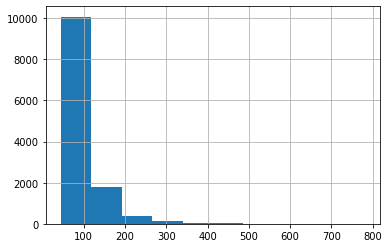

In [ ]:
df_crab_weighted.energy.hist()

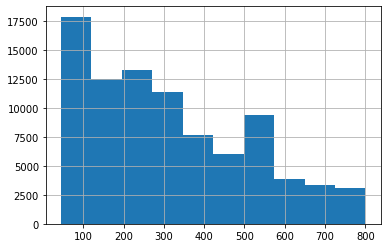

In [ ]:
df_albedo_weighted.energy.hist()

In [ ]:
df=pd.DataFrame()
df = df.iloc[0:0]

df_albedo_weighted = df_albedo_weighted.sample(frac=1).reset_index(drop=True)
df_cxb_weighted = df_cxb_weighted.sample(frac=1).reset_index(drop=True)
df_crab_weighted = df_crab_weighted.sample(frac=1).reset_index(drop=True)

df = df.append(df_crab_weighted.iloc[0:10000], ignore_index=True)
df = df.append(df_albedo_weighted.iloc[0:5000], ignore_index=True)
df = df.append(df_cxb_weighted.iloc[0:4000], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
df = df.drop('event_num',axis=1)

In [ ]:
df

,xpos,ypos,zpos,energy,Class
0,18.933366,25.336434,3.522642,248.697360,1
1,15.426946,1.112090,0.023605,694.747626,0
2,13.084650,19.723300,0.179742,45.401100,1
3,1.923829,20.685862,0.407666,88.741900,1
4,7.703620,20.222600,0.457112,584.516000,0
...,...,...,...,...,...
18995,2.474866,14.365290,4.461063,547.967685,0
18996,16.616851,9.326739,1.111631,57.671600,1
18997,22.846600,7.365580,0.199042,132.853000,0
18998,21.237430,11.251441,0.098369,45.186200,1


In [ ]:
pixel_map_calculator(df)

In [ ]:
df

,xpos,ypos,zpos,energy,Class,xpos_256,xpixel,ypos_256,ypixel,zpos1,zpos2,xpos_35,ypos_35
0,18.933366,25.336434,3.522642,248.697360,1,18.35,12,24.725,16,3.5,4,19.95,23.15
1,15.426946,1.112090,0.023605,694.747626,0,15.15,10,0.775,1,0.0,0,15.15,2.35
2,13.084650,19.723300,0.179742,45.401100,1,13.55,9,19.950,13,0.0,0,14.35,17.55
3,1.923829,20.685862,0.407666,88.741900,1,2.35,2,19.950,13,0.5,0,1.55,22.35
4,7.703620,20.222600,0.457112,584.516000,0,7.15,5,19.950,13,0.5,0,5.55,23.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,2.474866,14.365290,4.461063,547.967685,0,2.35,2,15.150,10,4.5,4,2.35,16.75
18996,16.616851,9.326739,1.111631,57.671600,1,16.75,11,8.750,6,1.0,1,18.35,10.35
18997,22.846600,7.365580,0.199042,132.853000,0,23.15,15,7.150,5,0.0,0,23.15,8.75
18998,21.237430,11.251441,0.098369,45.186200,1,21.55,14,11.950,8,0.0,0,23.15,13.55


In [ ]:
df = df[(df["xpos"]>=0) & (df["ypos"]>=0) & (df["zpos"]>=0) & (df["energy"]>=0)]

In [ ]:
df_v1 = df[["xpos","ypos","zpos","energy",'Class']]
df_v2 = df[["xpos_256","ypos_256","zpos1","energy",'Class']]
df_v3 = df[["xpos_256","ypos_256","zpos2","energy",'Class']]
df_v4 = df[["xpos_35","ypos_35","zpos1","energy",'Class']]
df_v5 = df[["xpos_35","ypos_35","zpos2","energy",'Class']]

In [ ]:
X_1 = df_v1.drop('Class', axis=1)
y_1 = df_v1['Class']

X_2 = df_v2.drop('Class', axis=1)
y_2 = df_v2['Class']

X_3 = df_v3.drop('Class', axis=1)
y_3 = df_v3['Class']

X_4 = df_v4.drop('Class', axis=1)
y_4 = df_v4['Class']

X_5 = df_v5.drop('Class', axis=1)
y_5 = df_v5['Class']


In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.2)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size = 0.2)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size = 0.2)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size = 0.2)

## Naive Bayes

In [ ]:
mnb = MultinomialNB()
start = time.time()
mnb.fit(X_train_1, y_train_1)
end = time.time()

In [ ]:
y_pred_1 = mnb.predict(X_test_1)

In [ ]:
print(classification_report(y_test_1,y_pred_1))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1774
           1       0.79      0.82      0.81      2026

    accuracy                           0.79      3800
   macro avg       0.79      0.79      0.79      3800
weighted avg       0.79      0.79      0.79      3800



In [ ]:
naive_test_1 = mnb.score(X_test_1, y_test_1)
naive_train_1 = mnb.score(X_train_1, y_train_1)
naive_time_1 = end - start

In [ ]:
mnb = MultinomialNB()
start = time.time()
mnb.fit(X_train_2, y_train_2)
end = time.time()

In [ ]:
y_pred_2 = mnb.predict(X_test_2)

In [ ]:
print(classification_report(y_test_2,y_pred_2))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1793
           1       0.78      0.80      0.79      2007

    accuracy                           0.78      3800
   macro avg       0.78      0.78      0.78      3800
weighted avg       0.78      0.78      0.78      3800



In [ ]:
naive_test_2 = mnb.score(X_test_2, y_test_2)
naive_train_2 = mnb.score(X_train_2, y_train_2)
naive_time_2 = end - start

In [ ]:
mnb = MultinomialNB()
start = time.time()
mnb.fit(X_train_3, y_train_3)
end = time.time()

In [ ]:
y_pred_3 = mnb.predict(X_test_3)

In [ ]:
print(classification_report(y_test_3,y_pred_3))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1801
           1       0.78      0.81      0.79      1999

    accuracy                           0.78      3800
   macro avg       0.78      0.78      0.78      3800
weighted avg       0.78      0.78      0.78      3800



In [ ]:
naive_test_3 = mnb.score(X_test_3, y_test_3)
naive_train_3 = mnb.score(X_train_3, y_train_3)
naive_time_3 = end - start

In [ ]:
mnb = MultinomialNB()
start = time.time()
mnb.fit(X_train_4, y_train_4)
end = time.time()

In [ ]:
y_pred_4 = mnb.predict(X_test_4)

In [ ]:
print(classification_report(y_test_4,y_pred_4))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1825
           1       0.76      0.82      0.79      1975

    accuracy                           0.77      3800
   macro avg       0.77      0.77      0.77      3800
weighted avg       0.77      0.77      0.77      3800



In [ ]:
naive_test_4 = mnb.score(X_test_4, y_test_4)
naive_train_4 = mnb.score(X_train_4, y_train_4)
naive_time_4 = end - start

In [ ]:
mnb = MultinomialNB()
start = time.time()
mnb.fit(X_train_5, y_train_5)
end = time.time()

In [ ]:
y_pred_5 = mnb.predict(X_test_5)

In [ ]:
print(classification_report(y_test_5,y_pred_5))

              precision    recall  f1-score   support

           0       0.79      0.72      0.76      1849
           1       0.76      0.82      0.79      1951

    accuracy                           0.77      3800
   macro avg       0.78      0.77      0.77      3800
weighted avg       0.77      0.77      0.77      3800



In [ ]:
naive_test_5 = mnb.score(X_test_5, y_test_5)
naive_train_5 = mnb.score(X_train_5, y_train_5)
naive_time_5 = end - start

In [ ]:
x = PrettyTable(["Models","Train Score","Test Score","Time"])
x.border = True
x.header = True
x.padding_width = 3

x.add_row(['Original Data', naive_train_1,naive_test_1,naive_time_1])
x.add_row(['256 pixel + zpos (0.5)', naive_train_2,naive_test_2,naive_time_2])
x.add_row(['256 pixel + zpos (1)', naive_train_3,naive_test_3,naive_time_3])
x.add_row(['35 channel + zpos (0.5)', naive_train_4,naive_test_4,naive_time_4])
x.add_row(['35 channel + zpos (1)', naive_train_5,naive_test_5,naive_time_5])

print(x)

+-----------------------------+------------------------+------------------------+--------------------------+
|            Models           |      Train Score       |       Test Score       |           Time           |
+-----------------------------+------------------------+------------------------+--------------------------+
|        Original Data        |   0.7716654602882148   |   0.7878947368421053   |   0.030431747436523438   |
|    256 pixel + zpos (0.5)   |   0.7717312627492269   |   0.7786842105263158   |   0.010066986083984375   |
|     256 pixel + zpos (1)    |   0.7725208922813713   |   0.7794736842105263   |   0.00831294059753418    |
|   35 channel + zpos (0.5)   |   0.7741001513456603   |   0.7697368421052632   |     0.00860595703125     |
|    35 channel + zpos (1)    |   0.7739685464236362   |   0.7728947368421053   |   0.012436389923095703   |
+-----------------------------+------------------------+------------------------+--------------------------+


In [ ]:
names = ["Original data","Data v2","Data v3","Data v4","Data v5"]
train_set = [naive_train_1,naive_train_2,naive_train_3,naive_train_4,naive_train_5]
test_set = [naive_test_1,naive_test_2,naive_test_3,naive_test_4,naive_test_5]

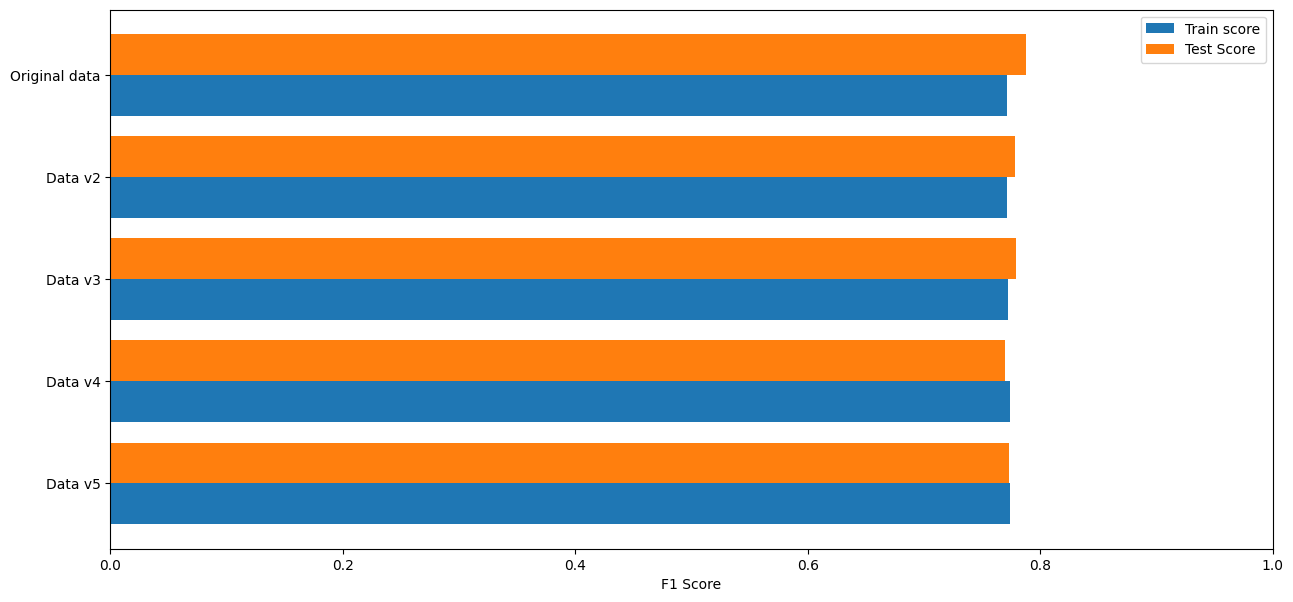

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15, 7))

y_pos = np.arange(len(names))

ax.barh(y_pos+0.2, train_set, 0.4, label = 'Train score')
ax.barh(y_pos-0.2, test_set, 0.4, label = 'Test Score')


ax.set_yticks(y_pos)
ax.set_yticklabels( names)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_xlabel('Score')
ax.set_xlim(0,1)

plt.legend()

## Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=1000)
start = time.time()
lr.fit(X_train_1, y_train_1)
end = time.time()

In [ ]:
y_pred_1 = lr.predict(X_test_1)

In [ ]:
print(classification_report(y_test_1,y_pred_1))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1774
           1       0.85      0.88      0.87      2026

    accuracy                           0.85      3800
   macro avg       0.85      0.85      0.85      3800
weighted avg       0.85      0.85      0.85      3800



In [ ]:
lr_test_1 = lr.score(X_test_1, y_test_1)
lr_train_1= lr.score(X_train_1, y_train_1)
lr_time_1 = end - start

In [ ]:
lr = LogisticRegression(max_iter=1000)
start = time.time()
lr.fit(X_train_2, y_train_2)
end = time.time()

In [ ]:
y_pred_2 = lr.predict(X_test_2)

In [ ]:
print(classification_report(y_test_2,y_pred_2))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1793
           1       0.84      0.87      0.85      2007

    accuracy                           0.84      3800
   macro avg       0.84      0.84      0.84      3800
weighted avg       0.84      0.84      0.84      3800



In [ ]:
lr_test_2 = lr.score(X_test_2, y_test_2)
lr_train_2 = lr.score(X_train_2, y_train_2)
lr_time_2 = end - start

In [ ]:
lr = LogisticRegression(max_iter=1000)
start = time.time()
lr.fit(X_train_3, y_train_3)
end = time.time()

In [ ]:
y_pred_3 = lr.predict(X_test_3)

In [ ]:
print(classification_report(y_test_3,y_pred_3))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1801
           1       0.83      0.87      0.85      1999

    accuracy                           0.84      3800
   macro avg       0.84      0.84      0.84      3800
weighted avg       0.84      0.84      0.84      3800



In [ ]:
lr_test_3 = lr.score(X_test_3, y_test_3)
lr_train_3 = lr.score(X_train_3, y_train_3)
lr_time_3 = end - start

In [ ]:
lr = LogisticRegression(max_iter=1000)
start = time.time()
lr.fit(X_train_4, y_train_4)
end = time.time()

In [ ]:
y_pred_4 = lr.predict(X_test_4)

In [ ]:
print(classification_report(y_test_4,y_pred_4))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1825
           1       0.83      0.88      0.85      1975

    accuracy                           0.84      3800
   macro avg       0.84      0.84      0.84      3800
weighted avg       0.84      0.84      0.84      3800



In [ ]:
lr_test_4 = lr.score(X_test_4, y_test_4)
lr_train_4= lr.score(X_train_4, y_train_4)
lr_time_4 = end - start

In [ ]:
lr = LogisticRegression(max_iter=1000)
start = time.time()
lr.fit(X_train_5, y_train_5)
end = time.time()

In [ ]:
y_pred_5 = lr.predict(X_test_5)

In [ ]:
print(classification_report(y_test_5,y_pred_5))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1849
           1       0.83      0.88      0.85      1951

    accuracy                           0.84      3800
   macro avg       0.85      0.84      0.84      3800
weighted avg       0.85      0.84      0.84      3800



In [ ]:
lr_test_5 = lr.score(X_test_5, y_test_5)
lr_train_5= lr.score(X_train_5, y_train_5)
lr_time_5 = end - start

In [ ]:
x = PrettyTable(["Models","Train Score","Test Score","Time"])
x.border = True
x.header = True
x.padding_width = 3

x.add_row(['Original Data', lr_train_1,lr_test_1,lr_time_1])
x.add_row(['256 pixel + zpos (0.5)', lr_train_2,lr_test_2,lr_time_2])
x.add_row(['256 pixel + zpos (1)', lr_train_3,lr_test_3,lr_time_3])
x.add_row(['35 channel + zpos (0.5)', lr_train_4,lr_test_4,lr_time_4])
x.add_row(['35 channel + zpos (1)', lr_train_5,lr_test_5,lr_time_5])

print(x)

+-----------------------------+------------------------+------------------------+-------------------------+
|            Models           |      Train Score       |       Test Score       |           Time          |
+-----------------------------+------------------------+------------------------+-------------------------+
|        Original Data        |   0.8398368098966902   |   0.8539473684210527   |    0.3149287700653076   |
|    256 pixel + zpos (0.5)   |   0.8423373034151477   |   0.8405263157894737   |    0.3253448009490967   |
|     256 pixel + zpos (1)    |   0.8421398960321116   |   0.8389473684210527   |   0.31480908393859863   |
|   35 channel + zpos (0.5)   |   0.8417450812660393   |   0.8423684210526315   |   0.42269444465637207   |
|    35 channel + zpos (1)    |   0.8406264394288346   |   0.8444736842105263   |    0.3251819610595703   |
+-----------------------------+------------------------+------------------------+-------------------------+


In [ ]:
names = ["Original data","Data v2","Data v3","Data v4","Data v5"]
train_set = [lr_train_1,lr_train_2,lr_train_3,lr_train_4,lr_train_5]
test_set = [lr_test_1,lr_test_2,lr_test_3,lr_test_4,lr_test_5]

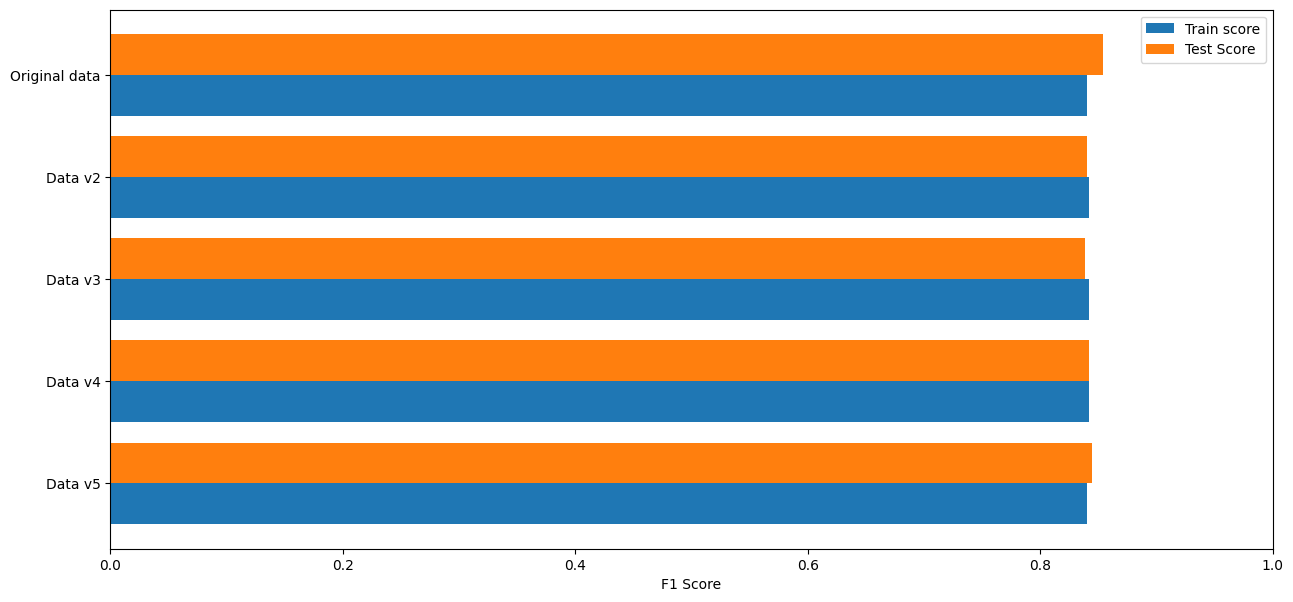

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15, 7))

y_pos = np.arange(len(names))

ax.barh(y_pos+0.2, train_set, 0.4, label = 'Train score')
ax.barh(y_pos-0.2, test_set, 0.4, label = 'Test Score')


ax.set_yticks(y_pos)
ax.set_yticklabels( names)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_xlabel('Score')
ax.set_xlim(0,1)

plt.legend()

## K-Nearest Neighbours

In [ ]:
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
start = time.time()
knn.fit(X_train_1, y_train_1)
end = time.time()

In [ ]:
y_pred_1 = knn.predict(X_test_1)

In [ ]:
print(classification_report(y_test_1,y_pred_1))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1774
           1       0.83      0.88      0.85      2026

    accuracy                           0.84      3800
   macro avg       0.84      0.84      0.84      3800
weighted avg       0.84      0.84      0.84      3800



In [ ]:
knn_test_1 = knn.score(X_test_1, y_test_1)
knn_train_1 = knn.score(X_train_1, y_train_1)
knn_time_1 = end - start

In [ ]:
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
start = time.time()
knn.fit(X_train_2, y_train_2)
end = time.time()

In [ ]:
y_pred_2 = knn.predict(X_test_2)

In [ ]:
print(classification_report(y_test_2,y_pred_2))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1793
           1       0.84      0.87      0.85      2007

    accuracy                           0.84      3800
   macro avg       0.84      0.84      0.84      3800
weighted avg       0.84      0.84      0.84      3800



In [ ]:
knn_test_2 = knn.score(X_test_2, y_test_2)
knn_train_2 = knn.score(X_train_2, y_train_2)
knn_time_2 = end - start

In [ ]:
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
start = time.time()
knn.fit(X_train_3, y_train_3)
end = time.time()

In [ ]:
y_pred_3 = knn.predict(X_test_3)

In [ ]:
print(classification_report(y_test_3,y_pred_3))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1801
           1       0.84      0.86      0.85      1999

    accuracy                           0.84      3800
   macro avg       0.84      0.84      0.84      3800
weighted avg       0.84      0.84      0.84      3800



In [ ]:
knn_test_3 = knn.score(X_test_3, y_test_3)
knn_train_3 = knn.score(X_train_3, y_train_3)
knn_time_3 = end - start

In [ ]:
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
start = time.time()
knn.fit(X_train_4, y_train_4)
end = time.time()

In [ ]:
y_pred_4 = knn.predict(X_test_4)

In [ ]:
print(classification_report(y_test_4,y_pred_4))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1825
           1       0.83      0.87      0.85      1975

    accuracy                           0.84      3800
   macro avg       0.84      0.84      0.84      3800
weighted avg       0.84      0.84      0.84      3800



In [ ]:
knn_test_4 = knn.score(X_test_4, y_test_4)
knn_train_4 = knn.score(X_train_4, y_train_4)
knn_time_4 = end - start

In [ ]:
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
start = time.time()
knn.fit(X_train_5, y_train_5)
end = time.time()

In [ ]:
y_pred_5 = knn.predict(X_test_5)

In [ ]:
print(classification_report(y_test_5,y_pred_5))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1849
           1       0.82      0.87      0.84      1951

    accuracy                           0.84      3800
   macro avg       0.84      0.83      0.84      3800
weighted avg       0.84      0.84      0.84      3800



In [ ]:
knn_test_5 = knn.score(X_test_5, y_test_5)
knn_train_5 = knn.score(X_train_5, y_train_5)
knn_time_5 = end - start

In [ ]:
x = PrettyTable(["Models","Train Score","Test Score","Time"])
x.border = True
x.header = True
x.padding_width = 3

x.add_row(['Original Data', knn_train_1,knn_test_1,knn_time_1])
x.add_row(['256 pixel + zpos (0.5)', knn_train_2,knn_test_2,knn_time_2])
x.add_row(['256 pixel + zpos (1)', knn_train_3,knn_test_3,knn_time_3])
x.add_row(['35 channel + zpos (0.5)', knn_train_4,knn_test_4,knn_time_4])
x.add_row(['35 channel + zpos (1)', knn_train_5,knn_test_5,knn_time_5])

print(x)

+-----------------------------+------------------------+------------------------+---------------------------+
|            Models           |      Train Score       |       Test Score       |            Time           |
+-----------------------------+------------------------+------------------------+---------------------------+
|        Original Data        |   0.8764887806803975   |   0.8394736842105263   |   0.0062372684478759766   |
|    256 pixel + zpos (0.5)   |   0.8778048299006382   |   0.8407894736842105   |    0.004613161087036133   |
|     256 pixel + zpos (1)    |   0.8747779166940843   |   0.8365789473684211   |    0.005214214324951172   |
|   35 channel + zpos (0.5)   |   0.877344212673554    |   0.8402631578947368   |    0.005926847457885742   |
|    35 channel + zpos (1)    |   0.8776074225176022   |   0.8357894736842105   |   0.0069103240966796875   |
+-----------------------------+------------------------+------------------------+---------------------------+


In [ ]:
names = ["Original data","Data v2","Data v3","Data v4","Data v5"]
train_set = [knn_train_1,knn_train_2,knn_train_3,knn_train_4,knn_train_5]
test_set = [knn_test_1,knn_test_2,knn_test_3,knn_test_4,knn_test_5]

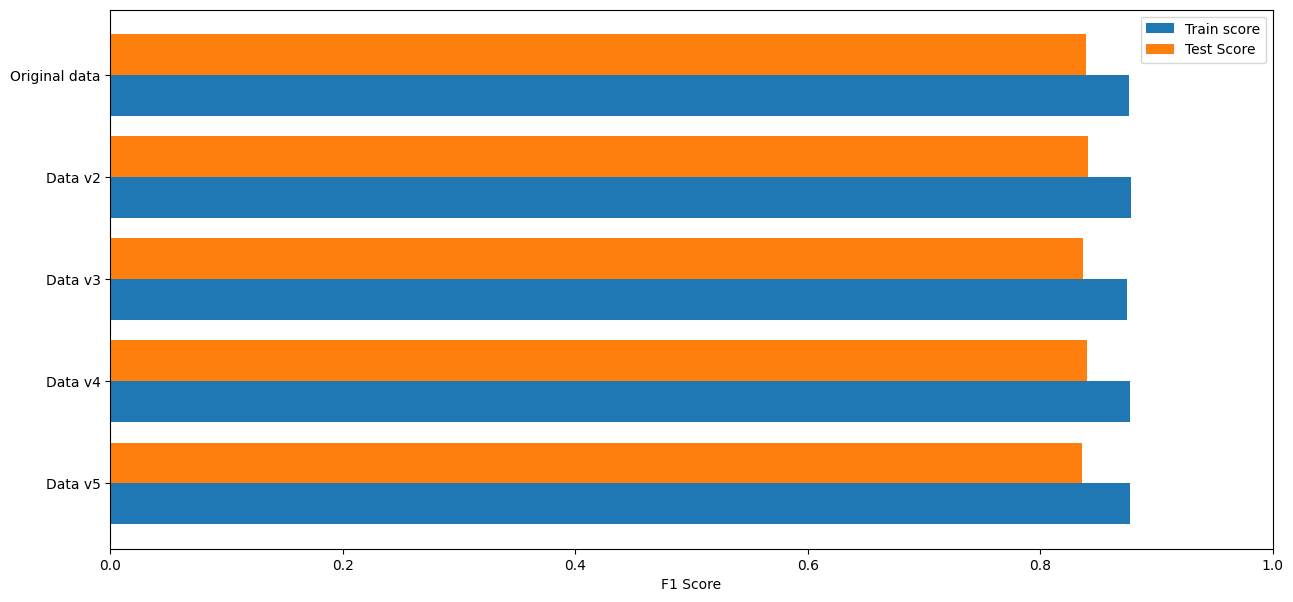

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15, 7))

y_pos = np.arange(len(names))

ax.barh(y_pos+0.2, train_set, 0.4, label = 'Train score')
ax.barh(y_pos-0.2, test_set, 0.4, label = 'Test Score')


ax.set_yticks(y_pos)
ax.set_yticklabels( names)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_xlabel('Score')
ax.set_xlim(0,1)

plt.legend()

## Decision Tree

In [ ]:
classifier = DecisionTreeClassifier()
start = time.time()
classifier.fit(X_train_1, y_train_1)
end = time.time()

In [ ]:
y_pred_1 = classifier.predict(X_test_1)

In [ ]:
print(classification_report(y_test_1,y_pred_1))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1774
           1       0.83      0.84      0.84      2026

    accuracy                           0.83      3800
   macro avg       0.83      0.83      0.83      3800
weighted avg       0.83      0.83      0.83      3800



In [ ]:
dtree_test_1 = classifier.score(X_test_1, y_test_1)
dtree_train_1 = classifier.score(X_train_1, y_train_1)
dtree_time_1 = end - start

In [ ]:
classifier = DecisionTreeClassifier()
start = time.time()
classifier.fit(X_train_2, y_train_2)
end = time.time()

In [ ]:
y_pred_2 = classifier.predict(X_test_2)

In [ ]:
print(classification_report(y_test_2,y_pred_2))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1793
           1       0.84      0.82      0.83      2007

    accuracy                           0.82      3800
   macro avg       0.82      0.82      0.82      3800
weighted avg       0.82      0.82      0.82      3800



In [ ]:
dtree_test_2 = classifier.score(X_test_2, y_test_2)
dtree_train_2 = classifier.score(X_train_2, y_train_2)
dtree_time_2 = end - start

In [ ]:
classifier = DecisionTreeClassifier()
start = time.time()
classifier.fit(X_train_3, y_train_3)
end = time.time()

In [ ]:
y_pred_3 = classifier.predict(X_test_3)

In [ ]:
print(classification_report(y_test_3,y_pred_3))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1801
           1       0.84      0.83      0.84      1999

    accuracy                           0.83      3800
   macro avg       0.83      0.83      0.83      3800
weighted avg       0.83      0.83      0.83      3800



In [ ]:
dtree_test_3 = classifier.score(X_test_3, y_test_3)
dtree_train_3 = classifier.score(X_train_3, y_train_3)
dtree_time_3 = end - start

In [ ]:
classifier = DecisionTreeClassifier()
start = time.time()
classifier.fit(X_train_4, y_train_4)
end = time.time()

In [ ]:
y_pred_4 = classifier.predict(X_test_4)

In [ ]:
print(classification_report(y_test_4,y_pred_4))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1825
           1       0.83      0.83      0.83      1975

    accuracy                           0.82      3800
   macro avg       0.82      0.82      0.82      3800
weighted avg       0.82      0.82      0.82      3800



In [ ]:
dtree_test_4 = classifier.score(X_test_4, y_test_4)
dtree_train_4 = classifier.score(X_train_4, y_train_4)
dtree_time_4 = end - start

In [ ]:
classifier = DecisionTreeClassifier()
start = time.time()
classifier.fit(X_train_5, y_train_5)
end = time.time()

In [ ]:
y_pred_5 = classifier.predict(X_test_5)

In [ ]:
print(classification_report(y_test_5,y_pred_5))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1849
           1       0.83      0.83      0.83      1951

    accuracy                           0.82      3800
   macro avg       0.82      0.82      0.82      3800
weighted avg       0.82      0.82      0.82      3800



In [ ]:
dtree_test_5 = classifier.score(X_test_5, y_test_5)
dtree_train_5 = classifier.score(X_train_5, y_train_5)
dtree_time_5 = end - start

In [ ]:
x = PrettyTable(["Models","Train Score","Test Score","Time"])
x.border = True
x.header = True
x.padding_width = 3

x.add_row(['Original Data', dtree_train_1,dtree_test_1,dtree_time_1])
x.add_row(['256 pixel + zpos (0.5)', dtree_train_2,dtree_test_2,dtree_time_2])
x.add_row(['256 pixel + zpos (1)', dtree_train_3,dtree_test_3,dtree_time_3])
x.add_row(['35 channel + zpos (0.5)', dtree_train_4,dtree_test_4,dtree_time_4])
x.add_row(['35 channel + zpos (1)', dtree_train_5,dtree_test_5,dtree_time_5])

print(x)

+-----------------------------+------------------------+------------------------+-------------------------+
|            Models           |      Train Score       |       Test Score       |           Time          |
+-----------------------------+------------------------+------------------------+-------------------------+
|        Original Data        |          1.0           |   0.8271052631578948   |   0.13694453239440918   |
|    256 pixel + zpos (0.5)   |   0.9993419753898796   |   0.8192105263157895   |   0.05463981628417969   |
|     256 pixel + zpos (1)    |   0.9987497532407712   |   0.8289473684210527   |   0.05474114418029785   |
|   35 channel + zpos (0.5)   |   0.9964466671053498   |   0.8213157894736842   |   0.05084371566772461   |
|    35 channel + zpos (1)    |   0.9963808646443377   |   0.8215789473684211   |   0.04963541030883789   |
+-----------------------------+------------------------+------------------------+-------------------------+


In [ ]:
names = ["Original data","Data v2","Data v3","Data v4","Data v5"]
train_set = [dtree_train_1,dtree_train_2,dtree_train_3,dtree_train_4,dtree_train_5]
test_set = [dtree_test_1,dtree_test_2,dtree_test_3,dtree_test_4,dtree_test_5]

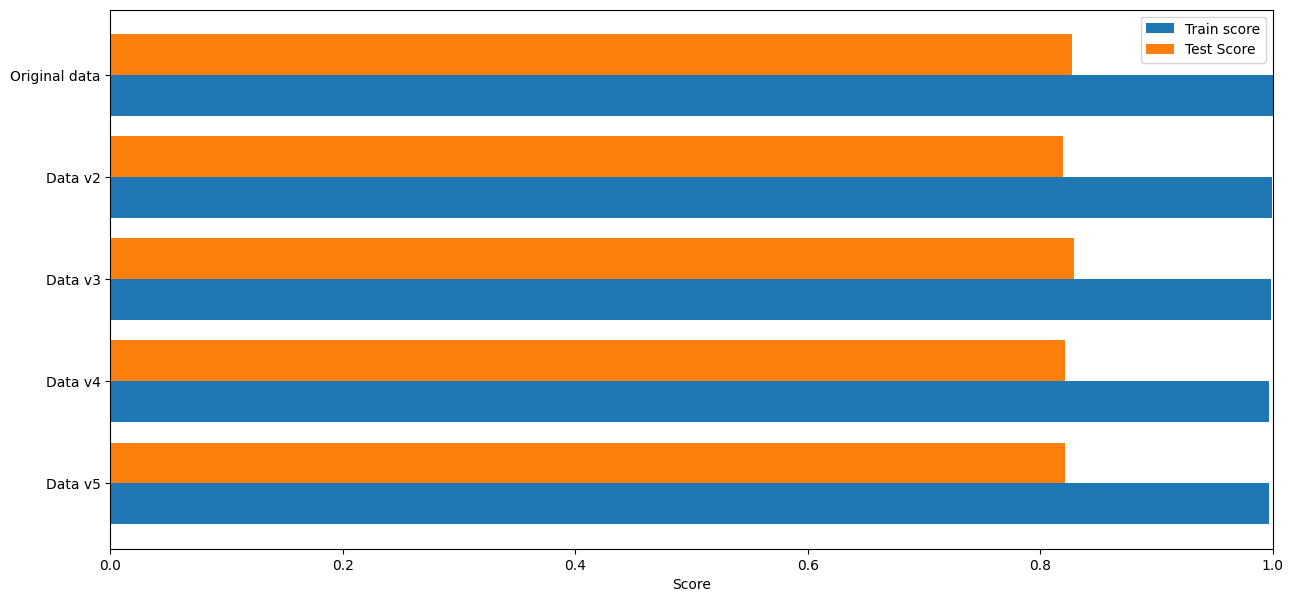

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15, 7))

y_pos = np.arange(len(names))

ax.barh(y_pos+0.2, train_set, 0.4, label = 'Train score')
ax.barh(y_pos-0.2, test_set, 0.4, label = 'Test Score')


ax.set_yticks(y_pos)
ax.set_yticklabels( names)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_xlabel('Score')
ax.set_xlim(0,1)

plt.legend()

## Random Forest

In [ ]:
clf=RandomForestClassifier(n_estimators=500,max_depth=100)
start = time.time()
clf.fit(X_train_1,y_train_1)
end = time.time()
y_pred_1 = clf.predict(X_test_1)

In [ ]:
print(classification_report(y_test_1,y_pred_1))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1774
           1       0.90      0.88      0.89      2026

    accuracy                           0.88      3800
   macro avg       0.88      0.88      0.88      3800
weighted avg       0.88      0.88      0.88      3800



In [ ]:
randomtree_test_1 = clf.score(X_test_1, y_test_1)
randomtree_train_1 = clf.score(X_train_1, y_train_1)
randomtree_time_1 = end - start

In [ ]:
clf=RandomForestClassifier(n_estimators=500,max_depth=100)
start = time.time()
clf.fit(X_train_2,y_train_2)
end = time.time()
y_pred_2 = clf.predict(X_test_2)

In [ ]:
print(classification_report(y_test_2,y_pred_2))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1793
           1       0.88      0.87      0.87      2007

    accuracy                           0.87      3800
   macro avg       0.87      0.87      0.87      3800
weighted avg       0.87      0.87      0.87      3800



In [ ]:
randomtree_test_2 = clf.score(X_test_2, y_test_2)
randomtree_train_2 = clf.score(X_train_2, y_train_2)
randomtree_time_2 = end - start

In [ ]:
clf=RandomForestClassifier(n_estimators=500,max_depth=100)
start = time.time()
clf.fit(X_train_3,y_train_3)
end = time.time()
y_pred_3 = clf.predict(X_test_3)

In [ ]:
print(classification_report(y_test_3,y_pred_3))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1801
           1       0.89      0.86      0.88      1999

    accuracy                           0.87      3800
   macro avg       0.87      0.87      0.87      3800
weighted avg       0.87      0.87      0.87      3800



In [ ]:
randomtree_test_3 = clf.score(X_test_3, y_test_3)
randomtree_train_3 = clf.score(X_train_3, y_train_3)
randomtree_time_3 = end - start

In [ ]:
clf=RandomForestClassifier(n_estimators=500,max_depth=100)
start = time.time()
clf.fit(X_train_4,y_train_4)
end = time.time()
y_pred_4 = clf.predict(X_test_4)

In [ ]:
print(classification_report(y_test_4,y_pred_4))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1825
           1       0.87      0.86      0.86      1975

    accuracy                           0.86      3800
   macro avg       0.86      0.86      0.86      3800
weighted avg       0.86      0.86      0.86      3800



In [ ]:
randomtree_test_4 = clf.score(X_test_4, y_test_4)
randomtree_train_4 = clf.score(X_train_4, y_train_4)
randomtree_time_4 = end - start

In [ ]:
clf=RandomForestClassifier(n_estimators=500,max_depth=100)
start = time.time()
clf.fit(X_train_5,y_train_5)
end = time.time()
y_pred_5 = clf.predict(X_test_5)

In [ ]:
print(classification_report(y_test_5,y_pred_5))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1849
           1       0.85      0.84      0.85      1951

    accuracy                           0.84      3800
   macro avg       0.84      0.84      0.84      3800
weighted avg       0.84      0.84      0.84      3800



In [ ]:
randomtree_test_5 = clf.score(X_test_5, y_test_5)
randomtree_train_5 = clf.score(X_train_5, y_train_5)
randomtree_time_5 = end - start

In [ ]:
x = PrettyTable(["Models","Train Score","Test Score","Time"])
x.border = True
x.header = True
x.padding_width = 3

x.add_row(['Original Data', randomtree_train_1,randomtree_test_1,randomtree_time_1])
x.add_row(['256 pixel + zpos (0.5)', randomtree_train_2,randomtree_test_2,randomtree_time_2])
x.add_row(['256 pixel + zpos (1)', randomtree_train_3,randomtree_test_3,randomtree_time_3])
x.add_row(['35 channel + zpos (0.5)', randomtree_train_4,randomtree_test_4,randomtree_time_4])
x.add_row(['35 channel + zpos (1)', randomtree_train_5,randomtree_test_5,randomtree_time_5])

print(x)

+-----------------------------+------------------------+------------------------+------------------------+
|            Models           |      Train Score       |       Test Score       |          Time          |
+-----------------------------+------------------------+------------------------+------------------------+
|        Original Data        |          1.0           |   0.881578947368421    |   25.983373880386353   |
|    256 pixel + zpos (0.5)   |   0.9993419753898796   |   0.8689473684210526   |   14.134675741195679   |
|     256 pixel + zpos (1)    |   0.9987497532407712   |   0.8713157894736843   |   16.14254379272461    |
|   35 channel + zpos (0.5)   |   0.9964466671053498   |   0.8573684210526316   |   15.054567813873291   |
|    35 channel + zpos (1)    |   0.9963808646443377   |   0.841842105263158    |   13.363366842269897   |
+-----------------------------+------------------------+------------------------+------------------------+


In [ ]:
names = ["Original data","Data v2","Data v3","Data v4","Data v5"]
train_set = [randomtree_train_1,randomtree_train_2,randomtree_train_3,randomtree_train_4,randomtree_train_5]
test_set = [randomtree_test_1,randomtree_test_2,randomtree_test_3,randomtree_test_4,randomtree_test_5]

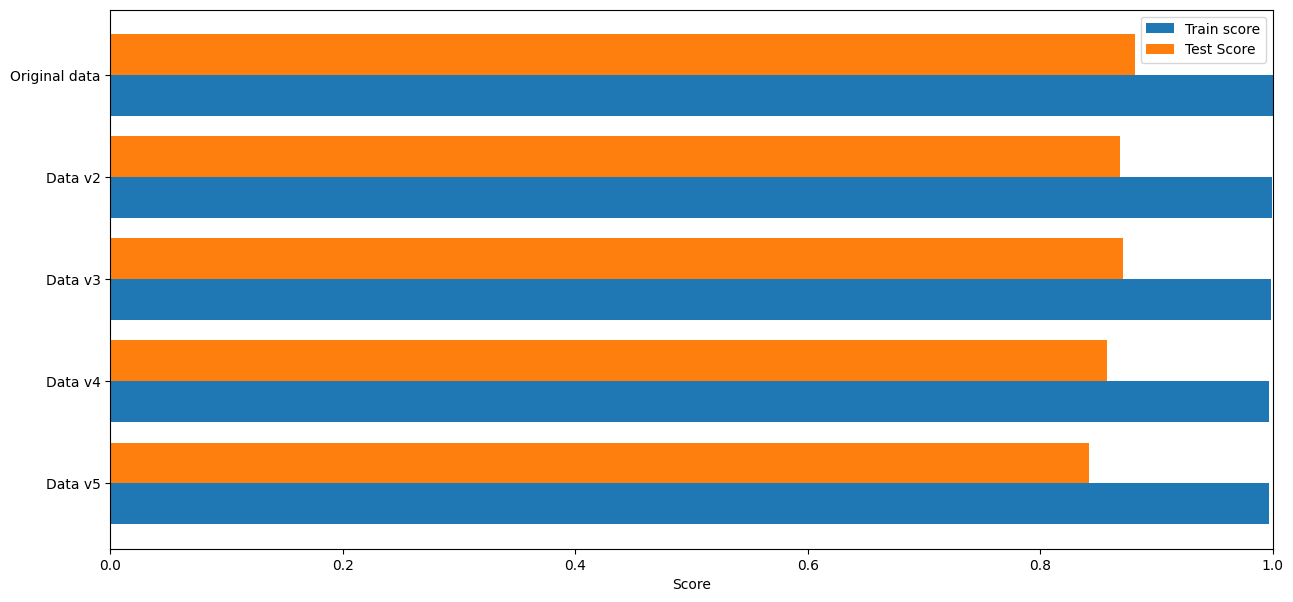

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15, 7))

y_pos = np.arange(len(names))

ax.barh(y_pos+0.2, train_set, 0.4, label = 'Train score')
ax.barh(y_pos-0.2, test_set, 0.4, label = 'Test Score')


ax.set_yticks(y_pos)
ax.set_yticklabels( names)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_xlabel('Score')
ax.set_xlim(0,1)

plt.legend()

## xG Boost

In [ ]:
model = XGBClassifier()
start = time.time()
model.fit(X_train_1, y_train_1)
end = time.time()

In [ ]:
y_pred_1 = model.predict(X_test_1)

In [ ]:
print(classification_report(y_test_1,y_pred_1))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1774
           1       0.89      0.88      0.88      2026

    accuracy                           0.88      3800
   macro avg       0.88      0.88      0.88      3800
weighted avg       0.88      0.88      0.88      3800



In [ ]:
xg_test_1 = model.score(X_test_1, y_test_1)
xg_train_1 = model.score(X_train_1, y_train_1)
xg_time_1 = end - start

In [ ]:
model = XGBClassifier()
start = time.time()
model.fit(X_train_2, y_train_2)
end = time.time()

In [ ]:
y_pred_2 = model.predict(X_test_2)

In [ ]:
print(classification_report(y_test_2,y_pred_2))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1793
           1       0.90      0.87      0.88      2007

    accuracy                           0.88      3800
   macro avg       0.88      0.88      0.88      3800
weighted avg       0.88      0.88      0.88      3800



In [ ]:
xg_test_2 = model.score(X_test_2, y_test_2)
xg_train_2 = model.score(X_train_2, y_train_2)
xg_time_2 = end - start

In [ ]:
model = XGBClassifier()
start = time.time()
model.fit(X_train_3, y_train_3)
end = time.time()

In [ ]:
y_pred_3 = model.predict(X_test_3)

In [ ]:
print(classification_report(y_test_3,y_pred_3))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1801
           1       0.89      0.86      0.88      1999

    accuracy                           0.87      3800
   macro avg       0.87      0.87      0.87      3800
weighted avg       0.87      0.87      0.87      3800



In [ ]:
xg_test_3 = model.score(X_test_3, y_test_3)
xg_train_3 = model.score(X_train_3, y_train_3)
xg_time_3 = end - start

In [ ]:
model = XGBClassifier()
start = time.time()
model.fit(X_train_4, y_train_4)
end = time.time()

In [ ]:
y_pred_4 = model.predict(X_test_4)

In [ ]:
print(classification_report(y_test_4,y_pred_4))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1825
           1       0.89      0.88      0.88      1975

    accuracy                           0.88      3800
   macro avg       0.88      0.88      0.88      3800
weighted avg       0.88      0.88      0.88      3800



In [ ]:
xg_test_4 = model.score(X_test_4, y_test_4)
xg_train_4 = model.score(X_train_4, y_train_4)
xg_time_4 = end - start

In [ ]:
model = XGBClassifier()
start = time.time()
model.fit(X_train_5, y_train_5)
end = time.time()

In [ ]:
y_pred_5 = model.predict(X_test_5)

In [ ]:
print(classification_report(y_test_5,y_pred_5))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1849
           1       0.88      0.87      0.88      1951

    accuracy                           0.88      3800
   macro avg       0.88      0.88      0.88      3800
weighted avg       0.88      0.88      0.88      3800



In [ ]:
xg_test_5 = model.score(X_test_5, y_test_5)
xg_train_5 = model.score(X_train_5, y_train_5)
xg_time_5 = end - start

In [ ]:
x = PrettyTable(["Models","Train Score","Test Score","Time"])
x.border = True
x.header = True
x.padding_width = 3

x.add_row(['Original Data', xg_train_1,xg_test_1,xg_time_1])
x.add_row(['256 pixel + zpos (0.5)', xg_train_2,xg_test_2,xg_time_2])
x.add_row(['256 pixel + zpos (1)', xg_train_3,xg_test_3,xg_time_3])
x.add_row(['35 channel + zpos (0.5)', xg_train_4,xg_test_4,xg_time_4])
x.add_row(['35 channel + zpos (1)', xg_train_5,xg_test_5,xg_time_5])

print(x)

+-----------------------------+------------------------+------------------------+------------------------+
|            Models           |      Train Score       |       Test Score       |          Time          |
+-----------------------------+------------------------+------------------------+------------------------+
|        Original Data        |   0.8807659406461802   |   0.876578947368421    |   0.8836228847503662   |
|    256 pixel + zpos (0.5)   |   0.8791208791208791   |   0.8794736842105263   |   0.7158703804016113   |
|     256 pixel + zpos (1)    |   0.8781996446667105   |   0.873421052631579    |   1.1338393688201904   |
|   35 channel + zpos (0.5)   |   0.8778706323616503   |   0.8807894736842106   |   0.7228319644927979   |
|    35 channel + zpos (1)    |   0.8775416200565901   |   0.876578947368421    |   1.8977429866790771   |
+-----------------------------+------------------------+------------------------+------------------------+


In [ ]:
names = ["Original data","Data v2","Data v3","Data v4","Data v5"]
train_set = [xg_train_1,xg_train_2,xg_train_3,xg_train_4,xg_train_5]
test_set = [xg_test_1,xg_test_2,xg_test_3,xg_test_4,xg_test_5]

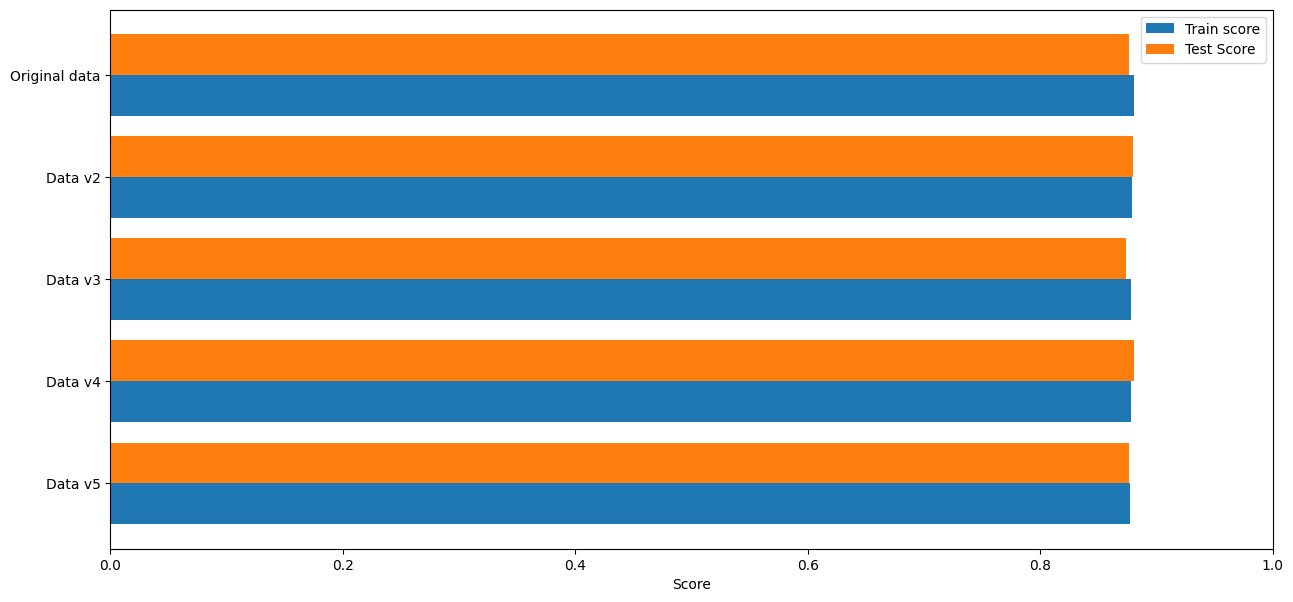

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15, 7))

y_pos = np.arange(len(names))

ax.barh(y_pos+0.2, train_set, 0.4, label = 'Train score')
ax.barh(y_pos-0.2, test_set, 0.4, label = 'Test Score')


ax.set_yticks(y_pos)
ax.set_yticklabels( names)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_xlabel('Score')
ax.set_xlim(0,1)

plt.legend()

# Comparison

In [ ]:

names2 = ['Naive Bayes','Log. Regression','KNN','Decision Tree','Random Forest','xG Boost']

score1 = [naive_test_1,lr_test_1,knn_test_1,dtree_test_1,randomtree_test_1,xg_test_1]
score2 = [naive_test_2,lr_test_2,knn_test_2,dtree_test_2,randomtree_test_2,xg_test_2]
score3 = [naive_test_3,lr_test_3,knn_test_3,dtree_test_3,randomtree_test_3,xg_test_3]
score4 = [naive_test_4,lr_test_4,knn_test_4,dtree_test_4,randomtree_test_4,xg_test_4]
score5 = [naive_test_5,lr_test_5,knn_test_5,dtree_test_5,randomtree_test_5,xg_test_5]

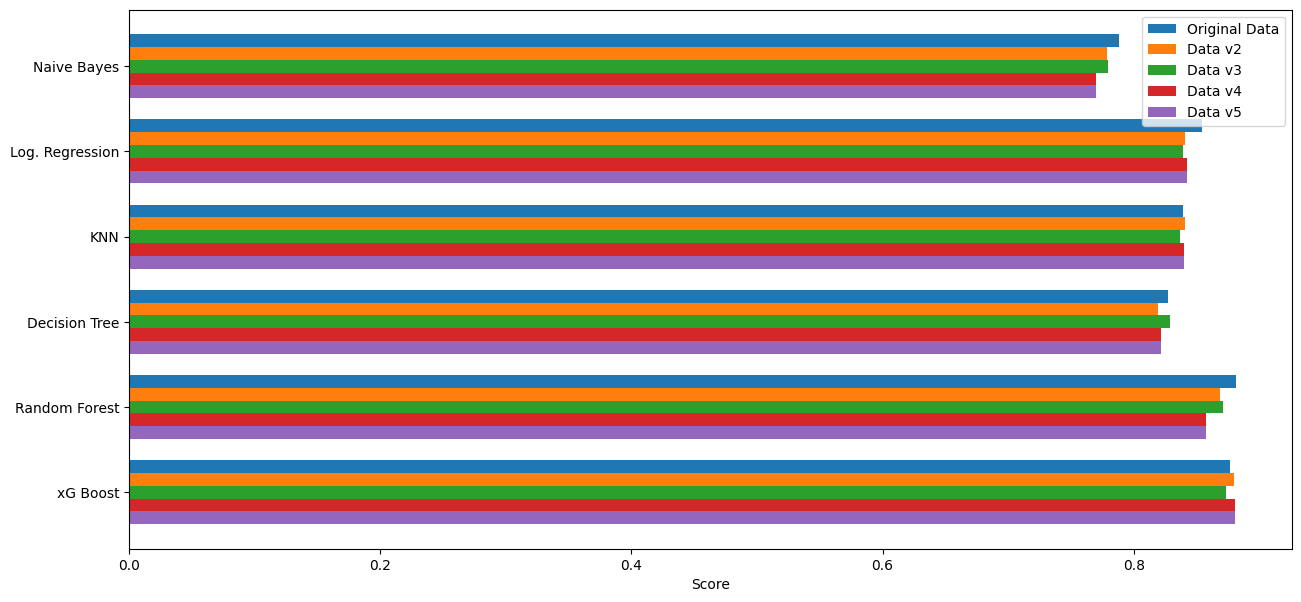

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15, 7))

y_pos = np.arange(len(names2))

ax.barh(y_pos-0.3, score1, 0.15, label = 'Original Data')
ax.barh(y_pos-0.15, score2, 0.15, label = 'Data v2')
ax.barh(y_pos, score3, 0.15, label = 'Data v3')
ax.barh(y_pos+0.15, score4, 0.15, label = 'Data v4')
ax.barh(y_pos+0.3, score4, 0.15, label = 'Data v5')

ax.set_yticks(y_pos)
ax.set_yticklabels( names2)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_xlabel('Score')

plt.legend()
plt.show()